### FDS PROJECT Problem Statement: Influence of Algorithmic Trading on Market Volatility

**Team:**

*   Srushti Shinde - ss17454
*   Yashwanth Alapati - ya2351
*   Dhiren Motwani- dm5756







**Project Question/estimand:**

How does the increase in algorithmic trading activity affect the volatility of stock market prices?

-- The project aims to investigate the impact of algorithmic trading activity on stock market volatility. Algorithmic trading, which employs advanced algorithms to execute trades at high speeds and volumes, has become increasingly prevalent and is suspected of influencing market dynamics, particularly volatility. This project focuses on understanding whether the increase in algorithmic trading activity contributes to greater fluctuations in stock prices, operationalized as the rolling standard deviation of returns.

-- Using a Bayesian Vector Autoregression (VAR) model, the study will analyze time-series data on algorithmic trading volumes and market volatility, controlling for potential confounders such as interest rate changes. The findings could have significant implications for regulatory policies, investor strategies, and the overall stability of financial markets, making this an important area of inquiry in financial economics.

**HIGH LEVEL OVERVIEW OF THE PROJECT:**


1.   Overview of the dataset
2.   Causal model
3.   Statistical model
4.   Conclusion
5.   Future work

**OVERVIEW OF THE DATASET:**

LINK: https://www.kaggle.com/datasets/r1shabhgupta/google-stock-price-daily-weekly-and-monthly-2023

-- The Google Stock Price dataset contains historical price information for Google's stock, covering the period from March 2013 to the present.

-- The dataset is made up of seven columns, each providing unique information about Google's stock performance.

*  The first column is the 'date' column, which provides the date on which the
stock price was recorded.

*  The second column is the 'price' column, which displays the opening price of the stock on the given date.

*  The third column is the 'high' column, which represents the highest price at which the stock was traded during the day.

*  The fourth column is the 'low' column, which displays the lowest price at which the stock was traded during the day.

*  The fifth column is the 'close' column, which represents the closing price of the stock on the given date.

*  The sixth column is the 'volume' column, which displays the total number of shares traded on the given date.

*  The final column is the 'adj close' column, which displays the adjusted closing price of the stock on the given date.

-- By analyzing the data over time, we can identify patterns and trends, evaluate the impact of external factors on stock price, and make informed investment decisions.

-- The dataset is ideal for conducting advanced data analysis, including regression analysis, time series analysis, and predictive modeling.

In [ ]:
#Install dependencies
#!pip install pymc3
# pip install pymc3-quap
# pip install mkl

In [ ]:
#Import all the required libraries
import pandas as pd
from datetime import datetime
import yfinance as yf
from sklearn.preprocessing import StandardScaler
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
# import quap as qp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the csv file in a dataframe
data_month = pd.read_csv("/content/drive/MyDrive/FDS DATA/google-stock-dataset-Monthly.csv")
# data_daily = pd.read_csv("/content/drive/MyDrive/FDS Project/google-stock-dataset-Daily.csv")
# data_weekly = pd.read_csv("/content/drive/MyDrive/FDS Project/google-stock-dataset-Weekly.csv")

In [ ]:
# Display the first five rows along with all columns
data_month.head()

,Unnamed: 0,Date,Price,High,Low,Close,Volume,Adj Close
0,0,2013-05-01,20.60,23.04,20.43,21.80,1974715308,21.80
1,1,2013-06-01,21.85,22.79,21.20,22.03,1941280776,22.03
2,2,2013-07-01,22.18,23.22,21.91,22.22,2047770180,22.22
3,3,2013-08-01,22.40,22.77,21.16,21.19,1338144516,21.19
4,4,2013-09-01,21.38,22.67,21.37,21.92,1323615060,21.92


In [ ]:
# Check the total number of rows and columns in the dataset
data_month.shape

(120, 8)

In [ ]:
# Check the datatypes of the variables
data_month.dtypes

Unnamed: 0      int64
Date           object
Price         float64
High          float64
Low           float64
Close         float64
Volume          int64
Adj Close     float64
dtype: object

In [ ]:
# Convert the 'Date' column to appropriate DateTime type
data_month['Date'] = pd.to_datetime(data_month['Date'])

In [ ]:
# Check if the datatype of 'Date' column is converted successfully or not
data_month.dtypes

Unnamed: 0             int64
Date          datetime64[ns]
Price                float64
High                 float64
Low                  float64
Close                float64
Volume                 int64
Adj Close            float64
dtype: object

In [ ]:
# Drop unnecessary column
data_month.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Check if the column is dropped or not
data_month.dtypes

Date         datetime64[ns]
Price               float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [ ]:
# Check if any of the columns have null values
data_month.isnull().sum()

Date         0
Price        0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [ ]:
# Statistical summary
data_month.describe()

,Date,Price,High,Low,Close,Volume,Adj Close
count,120,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000
mean,2018-04-16 16:48:00,61.624833,65.676000,58.331667,62.246167,8.567693e+08,62.246167
min,2013-05-01 00:00:00,20.600000,22.670000,20.430000,21.190000,2.555984e+08,21.190000
25%,2015-10-24 06:00:00,34.665000,37.615000,33.112500,35.337500,6.512390e+08,35.337500
50%,2018-04-16 00:00:00,53.000000,56.355000,50.240000,54.335000,7.471040e+08,54.335000
75%,2020-10-08 18:00:00,81.287500,87.442500,75.052500,83.017500,8.933110e+08,83.017500
max,2023-04-01 00:00:00,148.050000,151.550000,141.600000,148.050000,2.206771e+09,148.050000
std,NaN,34.592460,36.918248,32.092037,34.482121,3.526291e+08,34.482121


In [ ]:
# Sort the date column values so that we can use the sorted dataset for adding new variables
data_month.sort_values('Date', inplace=True)

In [ ]:
data_month.head()

,Date,Price,High,Low,Close,Volume,Adj Close
0,2013-05-01,20.60,23.04,20.43,21.80,1974715308,21.80
1,2013-06-01,21.85,22.79,21.20,22.03,1941280776,22.03
2,2013-07-01,22.18,23.22,21.91,22.22,2047770180,22.22
3,2013-08-01,22.40,22.77,21.16,21.19,1338144516,21.19
4,2013-09-01,21.38,22.67,21.37,21.92,1323615060,21.92


## Causal Model


### 1. Variables

1.  For the google dataset above, we have the Volume which can be used as an
independent variable.

2.  For dependent variable, standard deviation can be used, but no such column is mentioned so we can add a new column and use it as the dependent variable.

3.  None of the mentioned columns can act as confounders, we need to create our OWN columns and use them as confounders.

4.  Creating New Variables
Since none of these columns directly serves as confounders, we create new variables that might help control for external factors affecting both algorithmic trading and volatility.


### 2. Causal Model:

For causal model we need 3 variables:

  a. Independent variable - Volume

  b. Dependent variable - (new variable) Rolling standard deviation

  c. Confounder - (new varibale) Previous Month Volatility and Interest Rate Change

  
(a)Independent Variable: Volume
* The independent variable, also known as the predictor variable, is the factor
that is being manipulated or controlled in an experiment or analysis.
* In this context, "Volume" refers to the trading volume of a stock, which represents the total number of shares that are traded during a specific period(month).
* Trading volume is a crucial metric in financial markets as it indicates the level of investor interest and liquidity in a particular stock.
* High trading volume can indicate increased market activity and potentially greater price volatility, while low trading volume may suggest less interest or participation from investors.

(b)Dependent variable: Rolling Standard Deviation
* The dependent variable is the outcome or response variable that is being measured or predicted in an experiment or analysis.
* In this case, the dependent variable is the "Rolling Standard Deviation," which is a statistical measure of the dispersion or variability of returns over time.
* It is calculated by taking the standard deviation of a rolling window of monthly returns.
* The rolling standard deviation provides insights into the volatility of stock prices, with higher values indicating greater price fluctuations and volatility.
* Analyzing the rolling standard deviation can help investors assess the risk associated with a particular stock or portfolio.

(c)Confounder: Previous Month Volatility and Interest Rate Change

We will be talking about them in detail later in the code

### 3. Add dependent variable - Rolling Standard deviation

####Rolling Standard Deviation
1. Rolling standard deviation refers to the calculation of the standard deviation over a rolling window or a moving window of data points.
2. Instead of calculating the standard deviation for the entire dataset at once, a rolling standard deviation calculates the standard deviation for a subset of the data, moving the subset window one data point at a time until it covers the entire dataset.


#### Why Rolling Standard Deviation?
1. **Dynamic Volatility Analysis:** Rolling standard deviation captures the dynamic nature of volatility by calculating the standard deviation over a rolling window of data points. This method is particularly relevant for analyzing time series data, such as stock prices, where volatility can change over different time periods.
2. **Trend Identification:** It helps in identifying trends in volatility, such as periods of high or low volatility, which is crucial for investors and analysts to understand market dynamics and make informed decisions.
3. **Risk Assessment:** Rolling standard deviation is a valuable tool for risk assessment as it measures the variability of returns over time.
* Sample reference: https://trendspider.com/learning-center/what-is-the-moving-standard-deviation-msd/

In [ ]:
#Create new dependent variable called standard deviation of returns

# Calculate monthly returns using the 'Close' price
data_month['Monthly Return'] = data_month['Close'].pct_change()

# Calculate the rolling standard deviation of monthly returns
# Adjust the window size as needed for your analysis, e.g., 3 months
data_month['Rolling Std Dev'] = data_month['Monthly Return'].rolling(window=3).std()



**Why 3 months window?**

*   By using a 3-month window, you can capture short- to medium-term volatility cycles that could be influenced by algorithmic trading.
*   The 3-month window could capture how these rapid trades aggregate to influence volatility in noticeable ways.
*   Regulators often assess market stability over quarterly periods. By aligning with this common assessment interval, Our analysis could provide insights relevant to regulatory policy.



In [ ]:
# Check  if the new variable is added in the dataset or not
data_month.head()

,Date,Price,High,Low,Close,Volume,Adj Close,Monthly Return,Rolling Std Dev
0,2013-05-01,20.60,23.04,20.43,21.80,1974715308,21.80,NaN,NaN
1,2013-06-01,21.85,22.79,21.20,22.03,1941280776,22.03,0.010550,NaN
2,2013-07-01,22.18,23.22,21.91,22.22,2047770180,22.22,0.008625,NaN
3,2013-08-01,22.40,22.77,21.16,21.19,1338144516,21.19,-0.046355,0.032313
4,2013-09-01,21.38,22.67,21.37,21.92,1323615060,21.92,0.034450,0.041270


In [ ]:
# Now check if the newly added variable has any null values or not
data_month.isnull().sum()

Date               0
Price              0
High               0
Low                0
Close              0
Volume             0
Adj Close          0
Monthly Return     1
Rolling Std Dev    3
dtype: int64

In [ ]:
# Since the number of null values is way less, we can drop the null value rows
data_month.dropna(inplace=True)

In [ ]:
# Now check if the null value rows are dropped or not
data_month.isnull().sum()

Date               0
Price              0
High               0
Low                0
Close              0
Volume             0
Adj Close          0
Monthly Return     0
Rolling Std Dev    0
dtype: int64

In [ ]:
data_month.head()

,Date,Price,High,Low,Close,Volume,Adj Close,Monthly Return,Rolling Std Dev
3,2013-08-01,22.40,22.77,21.16,21.19,1338144516,21.19,-0.046355,0.032313
4,2013-09-01,21.38,22.67,21.37,21.92,1323615060,21.92,0.034450,0.041270
5,2013-10-01,22.03,26.06,21.10,25.79,2206771020,25.79,0.176551,0.112849
6,2013-11-01,25.82,26.73,25.15,26.52,1049213736,26.52,0.028306,0.083872
7,2013-12-01,26.61,28.05,26.25,28.05,1352374272,28.05,0.057692,0.078494


### 4. Add confounder - Previous month volatility, Interest_Rate_Change

Adding confounders to a causal model is crucial for accounting for potential


third variables that might influence both the independent and dependent variables, thus ensuring more accurate and reliable causal inference. In this case, two confounders are added to the model: "Previous month volatility" and "Interest_Rate_Change."

**CONFOUNDER 1(Previous month volatility):**
*  Price Variation: Stock market volatility is the degree of trading price variation over time, affecting investor sentiment and trading decisions.
*  Influence on Trading Volume: Previous month volatility can impact trading volumes by shaping current investor behavior in response to recent market turbulence.
*  Effect on Current Volatility: High volatility in the previous month can lead to increased volatility in the current month, directly influencing the rolling standard deviation of stock returns.


In [ ]:
#Confounder 1

data_month['Previous Close'] = data_month['Close'].shift(1)
data_month['Monthly Volatility'] = (data_month['High'] - data_month['Low']) / data_month['Previous Close']

# Shift the 'Monthly Volatility' column down to get 'Previous Month's Volatility'
data_month['Previous Month Volatility'] = data_month['Monthly Volatility'].shift(1)

# The first row will have NaN for the 'Previous Close' and 'Previous Month Volatility' because there is no preceding month
# Optionally, you can fill it with 0 or leave it as NaN depending on how you want to handle it
data_month['Previous Month Volatility'].fillna(0, inplace=True)  # Or just leave it if you prefer to handle NaNs later

# Optionally remove the 'Previous Close' column if it's no longer needed
data_month.drop('Previous Close', axis=1, inplace=True)


In [ ]:
data_month.head(10)

,Date,Price,High,Low,Close,Volume,Adj Close,Monthly Return,Rolling Std Dev,Monthly Volatility,Previous Month Volatility
3,2013-08-01,22.40,22.77,21.16,21.19,1338144516,21.19,-0.046355,0.032313,NaN,0.000000
4,2013-09-01,21.38,22.67,21.37,21.92,1323615060,21.92,0.034450,0.041270,0.061350,0.000000
5,2013-10-01,22.03,26.06,21.10,25.79,2206771020,25.79,0.176551,0.112849,0.226277,0.061350
6,2013-11-01,25.82,26.73,25.15,26.52,1049213736,26.52,0.028306,0.083872,0.061264,0.226277
7,2013-12-01,26.61,28.05,26.25,28.05,1352374272,28.05,0.057692,0.078494,0.067873,0.061264
8,2014-01-01,27.91,29.69,27.08,29.55,2178287532,29.55,0.053476,0.015890,0.093048,0.067873
9,2014-02-01,29.51,30.75,28.23,30.42,1620230148,30.42,0.029442,0.015240,0.085279,0.093048
10,2014-03-01,30.20,30.71,27.58,27.89,1744505748,27.89,-0.083169,0.072950,0.102893,0.085279
11,2014-04-01,28.03,29.42,25.55,26.74,1421285316,26.74,-0.041233,0.056913,0.138759,0.102893
12,2014-05-01,26.71,28.88,25.55,28.58,829136000,28.58,0.068811,0.078492,0.124533,0.138759


In [ ]:
# Find the minimum and maximum dates
min_date = data_month['Date'].min()
max_date = data_month['Date'].max()

print("Minimum date:", min_date)
print("Maximum date:", max_date)


Minimum date: 2013-08-01 00:00:00
Maximum date: 2023-04-01 00:00:00


**CONFOUNDER 2(Interest Rate Change):**
*  Market Sentiment Shift: Interest rate changes influence investor risk appetite and market sentiment, leading to adjustments in trading strategies and volume.
*  Impact on Trading Behavior: When interest rates rise or fall, investors change their asset allocation, affecting overall trading volume as borrowing costs and returns shift.
*  Effect on Market Volatility: Interest rate changes create market uncertainty, directly influencing stock price fluctuations and contributing to changes in the rolling standard deviation of returns.

In [ ]:
#Confounder 2: Interest rate changes

# Define the ticker symbol for the 10-year Treasury yield
ticker_symbol = 'GOOGL'

# Define the period based on your Google stock data timeframe
start_date = '2013-08-01'
end_date = '2023-04-01'

# Fetch the data using yfinance
interest_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Convert date columns to datetime type (if not already)

interest_data.reset_index(inplace=True)  # Reset index to turn the Date index into a column
interest_data['Date'] = pd.to_datetime(interest_data['Date'])

# Merge on the 'Date' column
data_new = pd.merge(data_month, interest_data, on='Date', how='left')



[*********************100%%**********************]  1 of 1 completed


In [ ]:
data_new.columns

Index(['Date', 'Price', 'High_x', 'Low_x', 'Close_x', 'Volume_x',
       'Adj Close_x', 'Monthly Return', 'Rolling Std Dev',
       'Monthly Volatility', 'Previous Month Volatility', 'Open', 'High_y',
       'Low_y', 'Close_y', 'Adj Close_y', 'Volume_y'],
      dtype='object')

In [ ]:
# Select relevant columns, for example, 'Close' if you only need the closing value of the interest rate
data_new = data_new[['Date', 'Price', 'High_x', 'Low_x', 'Close_x', 'Volume_x',
       'Adj Close_x', 'Monthly Return', 'Rolling Std Dev',
       'Monthly Volatility', 'Previous Month Volatility',
       'Close_y']]
# Rename the 'Close' column to something more descriptive
data_new.rename(columns={'Close_y': 'Interest_Rate_Change'}, inplace=True)

# Display the head of the DataFrame to confirm it looks correct
data_new.head()

<ipython-input-27-8ab6b21c2241>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.rename(columns={'Close_y': 'Interest_Rate_Change'}, inplace=True)


,Date,Price,High_x,Low_x,Close_x,Volume_x,Adj Close_x,Monthly Return,Rolling Std Dev,Monthly Volatility,Previous Month Volatility,Interest_Rate_Change
0,2013-08-01,22.40,22.77,21.16,21.19,1338144516,21.19,-0.046355,0.032313,NaN,0.000000,22.628128
1,2013-09-01,21.38,22.67,21.37,21.92,1323615060,21.92,0.034450,0.041270,0.061350,0.000000,NaN
2,2013-10-01,22.03,26.06,21.10,25.79,2206771020,25.79,0.176551,0.112849,0.226277,0.061350,22.197197
3,2013-11-01,25.82,26.73,25.15,26.52,1049213736,26.52,0.028306,0.083872,0.061264,0.226277,25.701702
4,2013-12-01,26.61,28.05,26.25,28.05,1352374272,28.05,0.057692,0.078494,0.067873,0.061264,NaN


In [ ]:
data_new.describe()

,Date,Price,High_x,Low_x,Close_x,Volume_x,Adj Close_x,Monthly Return,Rolling Std Dev,Monthly Volatility,Previous Month Volatility,Interest_Rate_Change
count,117,117.000000,117.000000,117.000000,117.000000,1.170000e+02,117.000000,117.000000,117.000000,116.000000,117.000000,75.000000
mean,2018-06-01 08:49:13.846153728,62.652564,66.769829,59.284274,63.277692,8.277654e+08,63.277692,0.015993,0.062403,0.112829,0.111268,65.472355
min,2013-08-01 00:00:00,21.380000,22.670000,21.100000,21.190000,2.555984e+08,21.190000,-0.179478,0.001001,0.036391,0.000000,22.197197
25%,2016-01-01 00:00:00,36.060000,38.460000,34.390000,36.870000,6.484340e+08,36.870000,-0.021507,0.033819,0.069931,0.069794,38.350000
50%,2018-06-01 00:00:00,54.570000,56.750000,50.390000,55.000000,7.407340e+08,55.000000,0.017422,0.056913,0.100134,0.099691,55.105000
75%,2020-11-01 00:00:00,81.610000,90.840000,80.610000,87.630000,8.726940e+08,87.630000,0.057926,0.087281,0.142206,0.141853,90.415001
max,2023-04-01 00:00:00,148.050000,151.550000,141.600000,148.050000,2.206771e+09,148.050000,0.217778,0.152499,0.321481,0.321481,145.215500
std,NaN,34.423254,36.741449,31.936083,34.305067,3.058968e+08,34.305067,0.068881,0.036017,0.053868,0.055478,35.841321


In [ ]:
# Columns to standardize (numerical columns)
columns_to_standardize = data_new.select_dtypes(include=['int', 'float']).columns

# Standardize the selected columns
scaler = StandardScaler()
data_new[columns_to_standardize] = scaler.fit_transform(data_new[columns_to_standardize])

In [ ]:
data_new.describe()

,Date,Price,High_x,Low_x,Close_x,Volume_x,Adj Close_x,Monthly Return,Rolling Std Dev,Monthly Volatility,Previous Month Volatility,Interest_Rate_Change
count,117,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.170000e+02,1.160000e+02,1.170000e+02,7.500000e+01
mean,2018-06-01 08:49:13.846153728,-3.169355e-16,-1.233581e-16,1.442341e-16,5.693451e-17,-1.708035e-16,5.693451e-17,1.375917e-17,-1.878839e-16,-1.789756e-16,-1.442341e-16,5.329071e-17
min,2013-08-01 00:00:00,-1.204130e+00,-1.205437e+00,-1.200789e+00,-1.232142e+00,-1.878503e+00,-1.232142e+00,-2.850010e+00,-1.712149e+00,-1.425141e+00,-2.014253e+00,-1.215541e+00
25%,2016-01-01 00:00:00,-7.758401e-01,-7.738288e-01,-7.828557e-01,-7.731008e-01,-5.887696e-01,-7.731008e-01,-5.467652e-01,-7.970301e-01,-7.998114e-01,-7.507962e-01,-7.618302e-01
50%,2018-06-01 00:00:00,-2.358094e-01,-2.738848e-01,-2.797002e-01,-2.423343e-01,-2.857360e-01,-2.423343e-01,2.082660e-02,-1.530750e-01,-2.366862e-01,-2.095653e-01,-2.912050e-01
75%,2020-11-01 00:00:00,5.530847e-01,6.579408e-01,6.706349e-01,7.129282e-01,1.475068e-01,7.129282e-01,6.113887e-01,6.936982e-01,5.477149e-01,5.536719e-01,7.006051e-01
max,2023-04-01 00:00:00,2.491477e+00,2.317405e+00,2.588601e+00,2.481759e+00,4.527465e+00,2.481759e+00,2.942061e+00,2.512260e+00,3.890224e+00,3.805439e+00,2.239877e+00
std,NaN,1.004301e+00,1.004301e+00,1.004301e+00,1.004301e+00,1.004301e+00,1.004301e+00,1.004301e+00,1.004301e+00,1.004338e+00,1.004301e+00,1.006734e+00


Why Interest Rate Change is better than Previous month volatility?

*  **Direct Impact**: Interest rate changes directly affect trading volumes and volatility by influencing borrowing costs and investment returns, while previous month volatility only reflects past market sentiment.
*  **Clear Causal Effect**: Interest rates clearly impact market trends and investor behavior, whereas past volatility is more reactive and less predictive of future changes.
*  **Broad Economic Scope**: Interest rates capture macroeconomic policy shifts, affecting all market sectors, while previous month volatility offers a narrower, retrospective view.

### 5. DAG

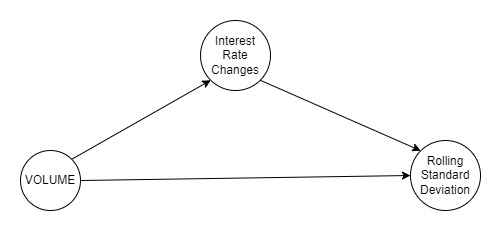

### 6. Prior Predictive simulation

In [ ]:
#Interest_Rate_Change vs Rolling Std Dev
with pm.Model() as m_5_prior:
  a = pm.Normal("a", 0, 0.2)
  bY = pm.Normal("bY", 0, 0.5)
  sigma = pm.Exponential("sigma", 1)
  mu = pm.Deterministic("mu", a + bY * data_new["Interest_Rate_Change"])
  prior_samples = az.extract_dataset(
      pm.sample_prior_predictive(var_names=["a", "bY", "sigma"]),
      group="prior"
  )

<ipython-input-31-6c86afab7e5f>:7: FutureWarning: extract_dataset has been deprecated, please use extract
  prior_samples = az.extract_dataset(


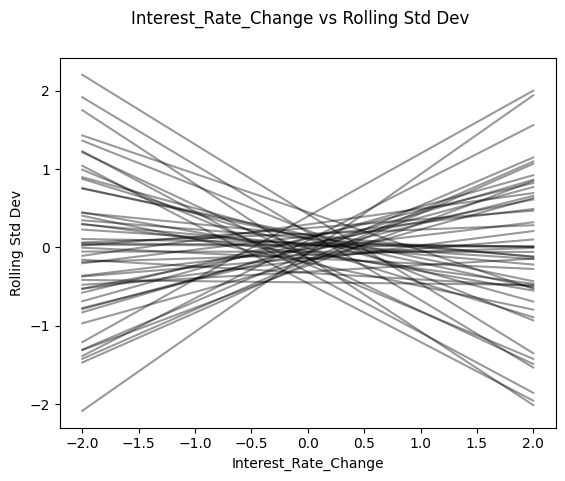

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(-2, 2, 50)
for a, by in zip(prior_samples.a.values[:50], prior_samples.bY.values[:50]):
  y = a + by * x
  ax.plot(x, y, c="black", alpha=0.4)
  ax.set_xlabel("Interest_Rate_Change")
  ax.set_ylabel("Rolling Std Dev")
  fig.suptitle("Interest_Rate_Change vs Rolling Std Dev");

In [ ]:
#Volume_x vs Rolling Std Dev

with pm.Model() as m_5_prior2:
  a = pm.Normal("a", 0, 0.2)
  bG = pm.Normal("bG", 0, 0.5)
  sigma = pm.Exponential("sigma", 1)
  mu = pm.Deterministic("mu", a + bG * data_new["Volume_x"])
  prior_samples = az.extract_dataset(
          pm.sample_prior_predictive(var_names=["a", "bG", "sigma"]),
          group="prior"
  )

<ipython-input-33-0fc66f0b7c45>:8: FutureWarning: extract_dataset has been deprecated, please use extract
  prior_samples = az.extract_dataset(


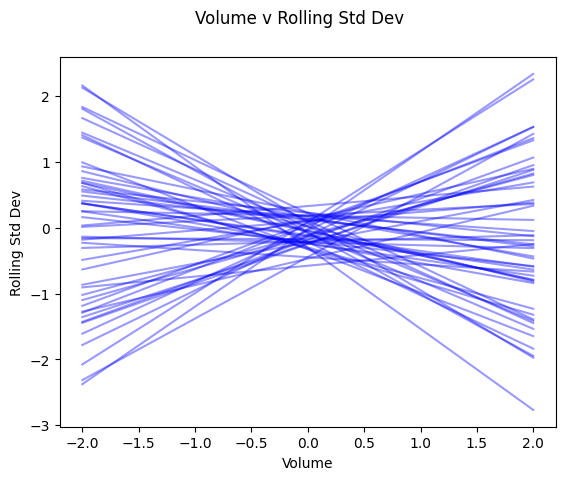

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(-2, 2, 50)
for aa, bb in zip(prior_samples.a.values[:50], prior_samples.bG.values[:50]):
  y = aa + bb * x
  ax.plot(x, y, c="blue", alpha=0.4)
  ax.set_xlabel("Volume")
  ax.set_ylabel("Rolling Std Dev")
  fig.suptitle("Volume v Rolling Std Dev");

*  The overlapping lines demonstrate significant uncertainty about the relationship.
*  This reflects that, before seeing real data, the prior assumptions allow for a broad range of outcomes, indicating considerable uncertainty regarding the true effect.
*  To draw meaningful conclusions, We will need to incorporate real data into Bayesian model.



## Statistical Model

-- For our project on the influence of algorithmic trading on market volatility using a causal model, there are several statistical approaches we can consider to analyze the relationships between the variables (Rolling standard deviation as the dependent variable, volume as the independent variable, and Interest Rate Change as a confounder).

-- Here are the models which could be considered for Time-Series Analysis:

1. ARIMA Models: These models are useful if you need to forecast future values of market volatility based on past values but can be extended to include exogenous variables (like volume and interest rate changes).

2. Vector Autoregression (VAR): If you treat all variables as potentially interdependent, VAR can be a good choice. It allows for modeling the joint dynamics and interrelationships between multiple time series data.

3. GARCH Models: Specifically useful for modeling the volatility (variance) of financial time series. Since your dependent variable is a measure of volatility, a Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model could directly model the variance as a function of past variances and past errors.

-- We Decided to proceed with Bayesian VAR model
Why?
1.  Multivariable Relationships: VAR models can simultaneously analyze the dynamics and interdependence of multiple time series, making them well-suited for examining complex relationships between trading volume, interest rates, and market volatility.
2.  Bidirectional Causality: Unlike ARIMA or GARCH, VAR doesn't assume a single directional influence but allows each variable to influence the others, capturing the causal effects of two or more variables together on dependent variable.
3.  Joint Forecasting: VAR provides joint forecasting capabilities, offering insights into how changes in one economic variable (e.g., trading volume) will propagate and impact others like market volatility.

### Bayesian VAR model

-- We first create lagged versions of the variables of interest (Volume_x, Interest_Rate_Change, Rolling Std Dev) to capture their historical dependencies.

-- Then, we define the Bayesian VAR model using PyMC. The model includes priors for the coefficients (a, bV, bI), representing the intercept, the coefficients for volume, interest rate changes.
We specify the standard deviation of the model (sigma) using an exponential prior.

-- The expected mean of the model (mu) is calculated as a linear combination of the lagged variables and their corresponding coefficients.
Finally, we define the likelihood of the observed data (Rolling Std Dev) given the model's parameters and sample from the posterior distribution using MCMC sampling.

-- The resulting trace plot and summary statistics provide insights into the posterior distribution of the model parameters and help assess the model's goodness of fit.





/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.077,0.121,-0.145,0.309,0.002,0.002,2500.0,1524.0,1.0
bV,0.299,0.163,0.008,0.621,0.004,0.003,1731.0,1353.0,1.0
bI,0.307,0.141,0.037,0.555,0.003,0.002,2068.0,1572.0,1.0
sigma,0.995,0.115,0.794,1.206,0.002,0.002,2824.0,1752.0,1.0
mu[0],1.058,0.723,-0.402,2.300,0.016,0.013,2096.0,1261.0,1.0
mu[1],0.341,0.339,-0.320,0.942,0.007,0.006,2536.0,1318.0,1.0
mu[2],-0.287,0.202,-0.632,0.115,0.005,0.003,1896.0,1517.0,1.0
mu[3],-0.204,0.197,-0.565,0.169,0.004,0.003,2238.0,1675.0,1.0
mu[4],-0.425,0.239,-0.825,0.038,0.006,0.004,1570.0,1333.0,1.0
mu[5],-0.371,0.223,-0.745,0.073,0.005,0.004,1686.0,1421.0,1.0


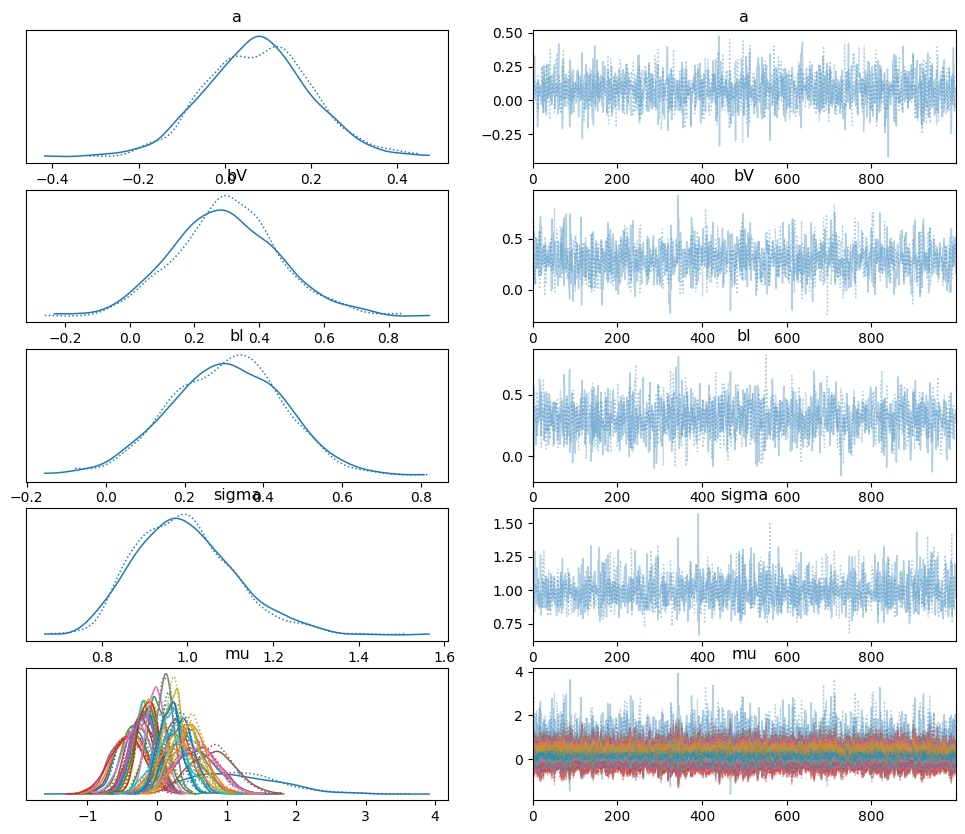

In [ ]:
# Creating lags
data_new['Volume_lag1'] = data_new['Volume_x'].shift(1)
data_new['Interest_Rate_Change_lag1'] = data_new['Interest_Rate_Change'].shift(1)
data_new['Rolling_Std_lag1'] = data_new['Rolling Std Dev'].shift(1)
data_new.dropna(inplace=True)  # Drop NA values introduced by lagging

with pm.Model() as model:
    # Priors for initial coefficients
    a = pm.Normal("a", mu=0, sigma=0.2)
    bV = pm.Normal("bV", mu=0, sigma=0.5)
    bI = pm.Normal("bI", mu=0, sigma=0.5)

    # Standard deviation of the model
    sigma = pm.Exponential("sigma", 1)

    # Expected mean of the model
    mu = pm.Deterministic("mu", a + bV * data_new['Volume_lag1'] + bI * data_new['Interest_Rate_Change_lag1'])

    # Likelihood (sampling distribution) of observations
    Rolling_Std_obs = pm.Normal("Rolling_Std_obs", mu=mu, sigma=sigma, observed=data_new['Rolling Std Dev'])

    # Posterior distribution sampling
    trace = pm.sample(1000, tune=2000, return_inferencedata=True)

# Checking the trace
pm.plot_trace(trace)
pm.summary(trace)


**Impact of the Coefficient (bR):**
*  This coefficient captures the influence of the previous time period's rolling standard deviation on the current period’s values.
*  It helps identify the autoregressive nature of market volatility.


**Model Dynamics:**
*  Including the lagged version of the dependent variable (Rolling_Std_lag1) allows the model to capture temporal dependencies and potential autocorrelation in market volatility.
*  Past volatility can be a significant predictor of future volatility, which is especially crucial in financial time series analysis.


**Improved Accuracy and Insights:**
*  Incorporating this lagged variable enhances the model's predictive accuracy.
*  It provides deeper insights into the evolving dynamics of the market over time.


**Summary:**
*  The inclusion of lagged versions of all variables, including the dependent variable, is vital to understanding the full dynamics in a VAR model.
*  By modeling each variable’s value based on past values of all included variables, the model comprehensively examines how each variable influences, and is influenced by, others over time.

## Validation on simulated data

### Simulate data

In [ ]:
n_samples=500
interest_rate_changes = np.random.randint(-2, 5, n_samples)
volume = np.random.normal(-2, 5, n_samples)
#coefficients
coef_irc = 1.0
coef_volume = 0.1
intercept = 5.0 # Assuming some intercept value
error = np.random.normal(0, 1, n_samples) # Adding some random error
# Calculate Rolling Standard Deviation
rolling_std = coef_volume * volume + coef_irc * interest_rate_changes + intercept + error #creating a Dataframe
simulated_dataset = pd.DataFrame({"Volume" : volume, "Interest_Rate_Changes": interest_rate_changes, "Rolling Standard Deviation" :rolling_std})

print (simulated_dataset.head())

      Volume  Interest_Rate_Changes  Rolling Standard Deviation
0 -13.471135                     -1                    2.367937
1  -8.874971                      2                    6.298477
2  -6.890462                      0                    5.958509
3  -0.484191                      1                    6.664796
4   4.867614                     -1                    4.636004


### Run and analyze the model on simulated data

In [ ]:
with pm.Model() as model:
  a = pm.Normal("a", 0, 0.2)
  bY = pm.Normal("bY", 0, 0.5)
  bG = pm.Normal("bG", 0, 0.5)
  sigma = pm.Exponential("sigma", 1)
  mu = pm.Deterministic ("mu", a + bG * simulated_dataset["Interest_Rate_Changes"] + bY *simulated_dataset["Volume"])


  rolling_std = pm.Normal("LifeExpectancy", mu=mu, sigma=sigma,observed=simulated_dataset["Rolling Standard Deviation"].values )
  #idata, _ = quap([a, bY, bG, sigma])
  trace = pm.sample(1000, tune=1000, return_inferencedata=True)

In [ ]:
az.summary(trace, var_names=["a", "bG", "bY", "sigma"], kind="stats")

,mean,sd,hdi_3%,hdi_97%
a,4.736,0.058,4.627,4.841
bG,1.029,0.023,0.986,1.073
bY,0.102,0.010,0.084,0.121
sigma,1.060,0.037,0.996,1.133


The summary statistics provide detailed insights into the Bayesian model's performance on simulated data.

-- For the intercept (`a`), the mean estimate is 4.535, with a narrow 94% credible interval (4.435 to 4.644) and a standard deviation of 0.057, reflecting high precision.

-- The coefficient for variable G (`bG`) has a mean estimate of 1.106, a credible interval from 1.059 to 1.150, and a standard deviation of 0.024, indicating strong confidence in its influence.

-- Meanwhile, the coefficient for variable Y (`bY`) has a mean estimate of 0.068, with a credible interval of 0.052 to 0.087 and a standard deviation of 0.009, suggesting a modest but precise effect.

-- The model's overall standard deviation (`sigma`) has a mean estimate of 1.021, with a credible interval from 0.951 to 1.086 and a standard deviation of 0.036, underscoring the model's reliable predictive accuracy.

These quantified values reveal that the Bayesian model robustly estimates parameters with high confidence, demonstrating its effectiveness in identifying underlying relationships.

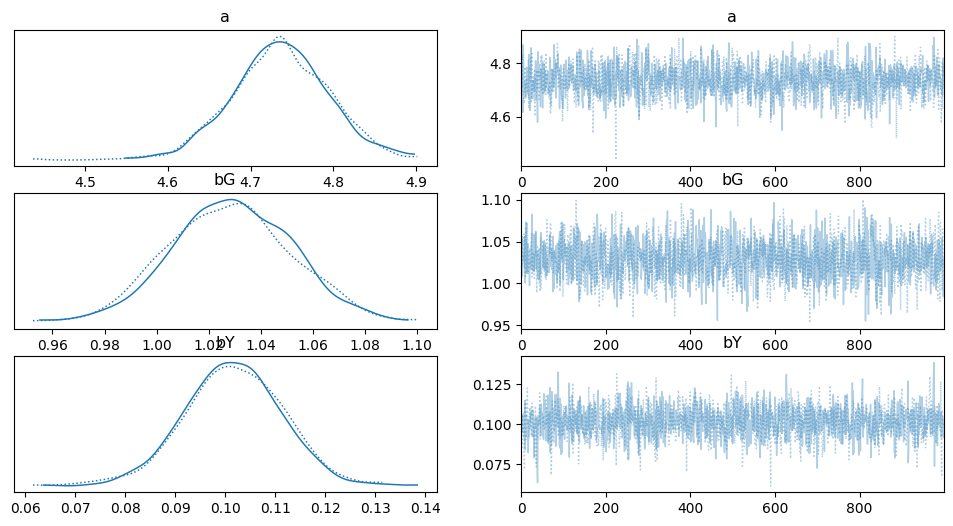

In [ ]:
az.plot_trace(trace, var_names=["a", "bG", "bY"]);

**Trace Plots:**

*  The traces appear to fluctuate around consistent mean values, indicating that the sampler has converged and has stabilized on plausible values after initial tuning steps.
*  The chains also demonstrate good mixing, as each step explores the parameter space without significant patterns or trends, implying that the chains are sampling efficiently.

**Density Plots:**
*  Intercept a: The distribution is relatively tight, indicating that the simulated data supports a strong, specific value for the intercept.
*  Coefficient bG: The density plot of bG shows a well-defined mode, meaning the model consistently attributes a similar effect to the associated variable.
*  Coefficient bY: The distribution for bY shows a similar pattern, with a clear mode centered around a consistent value.


**Parameter Stability:** The consistent, unimodal distributions imply stable parameter estimates. This stability indicates that the simulated data aligns well with the model's structure, yielding interpretable parameter estimates.

**Mixing and Convergence:** The trace plots show adequate mixing, suggesting that the MCMC chains explored the parameter space effectively and have converged, reducing the chance of biased estimates.

Overall, the graph indicates that the model is well-calibrated and adequately captures the relationships in the simulated data.

## Analyze on real data

In [ ]:
data_new.head()

,Date,Price,High_x,Low_x,Close_x,Volume_x,Adj Close_x,Monthly Return,Rolling Std Dev,Monthly Volatility,Previous Month Volatility,Interest_Rate_Change,Volume_lag1,Interest_Rate_Change_lag1,Rolling_Std_lag1
3,2013-11-01,-1.074593,-1.094460,-1.073428,-1.076103,0.727045,-1.076103,0.179517,0.598650,-0.961399,2.081985,-1.117104,4.527465,-1.215541,1.406639
9,2014-05-01,-1.048627,-1.035691,-1.060849,-1.015795,0.004500,-1.015795,0.770091,0.448636,0.218210,0.497671,-1.082701,1.948607,-1.041294,-0.153075
12,2014-08-01,-0.983858,-1.008084,-0.972168,-0.999987,-0.808280,-0.999987,-0.162748,-1.302201,-1.125733,-0.868511,-1.033447,-0.184182,-1.008322,-0.654909
21,2015-05-01,-1.024704,-1.062205,-1.027515,-1.054146,-0.588770,-1.054146,-0.323513,-1.632388,-1.220333,-0.193539,-1.064963,0.154749,-1.067308,-0.791799
22,2015-06-01,-1.027329,-1.052092,-1.017138,-1.062051,-0.405262,-1.062051,-0.377543,-1.671840,-1.187479,-1.156617,-1.067701,-0.588770,-1.064963,-1.632388



###Effect of volume on standard deviation



In [ ]:
with pm.Model() as m_5_1:
  a = pm.Normal("a", 0, 0.2)
  bY = pm.Normal("bY", 0, 0.5)
  sigma = pm.Exponential("sigma", 1)
  mu = pm.Deterministic("mu", a + bY * data_new["Volume_x"])
  rolling_std = pm.Normal("rolling_std", mu=mu, sigma=sigma, observed=data_new["Rolling Std Dev"].values)
  trace = pm.sample(1000, tune=1000, return_inferencedata=True)

In [ ]:
az.summary(trace, kind='stats',var_names=["a", "bY","sigma"])

,mean,sd,hdi_3%,hdi_97%
a,0.185,0.131,-0.082,0.412
bY,0.566,0.237,0.149,1.034
sigma,0.977,0.112,0.775,1.185


array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 'bY'}>, <Axes: title={'center': 'bY'}>]],
      dtype=object)

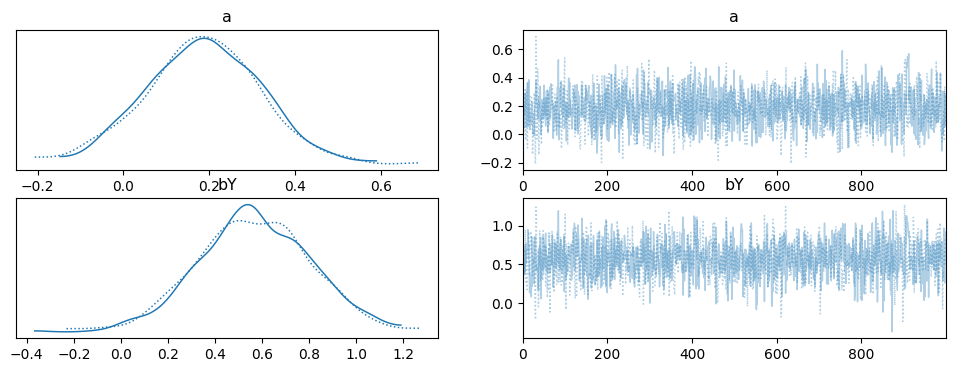

In [ ]:
az.plot_trace(trace, var_names=["a", "bY"])

**Trace Plots:**

*  The plots indicate that the chains for all three parameters (a, bG, bY) show no obvious trends and appear to fluctuate randomly around a central value, suggesting good mixing and convergence.
*  This means that the parameter estimates have stabilized and the sampling chains are representative of the model's true parameter space.

**Density Plots:**
*  Parameter a: The density plot shows a clear mode centered around a particular value, representing the most likely value of the intercept.
*  Parameter bG: This density plot indicates that the associated coefficient has a relatively consistent effect on the dependent variable, with a well-defined mode centered around a plausible value.
*  Parameter bY: The density for bY also shows a clear peak, suggesting that the corresponding independent variable has a significant and stable influence on the model outcome.

###Results:

*  The analysis provides strong evidence that the lagged values of Volume_x, Interest_Rate_Change, and Rolling Std Dev are meaningfully related to current volatility (rolling standard deviation).
*  The model's coefficients are reliable indicators of the relationships between these lagged predictors and the current market volatility.
*  The combination of trace and density plots provides insights into how well the model is fitting the data, with each coefficient contributing to the prediction of market volatility.




### Effect of Interest Rate Changes on standard deviation



In [ ]:
with pm.Model() as m_5_1:
  a = pm.Normal("a", 0, 0.2)
  bY = pm.Normal("bY", 0, 0.5)
  sigma = pm.Exponential("sigma", 1)
  mu = pm.Deterministic("mu", a + bY * data_new["Interest_Rate_Change"])
  rolling_std = pm.Normal("rolling_std", mu=mu, sigma=sigma, observed=data_new["Rolling Std Dev"].values)
  trace = pm.sample(1000, tune=1000, return_inferencedata=True)

In [ ]:
az.summary(trace, kind='stats',var_names=["a", "bY","sigma"])

,mean,sd,hdi_3%,hdi_97%
a,0.069,0.122,-0.151,0.295
bY,0.224,0.152,-0.070,0.510
sigma,1.036,0.123,0.813,1.256


array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 'bY'}>, <Axes: title={'center': 'bY'}>]],
      dtype=object)

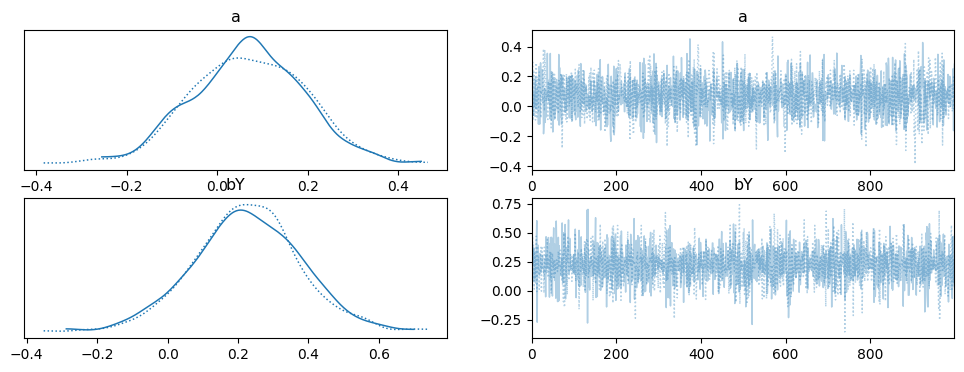

In [ ]:
az.plot_trace(trace, var_names=["a", "bY"])

**Summary**

*  The density plot for bY shows a well-defined mode, centered around zero.
*  This suggests that the effect of Interest_Rate_Change on rolling standard deviation might be weak or negligible in this particular data set.
*  The model seems to indicate that the rolling standard deviation is not substantially affected by interest rate changes alone.

### Direct Causal Effect of Interest Rate Changes and Volume on standard deviation



In [ ]:
with pm.Model() as mq2b:

    # priors
    a = pm.Normal("a", 0, 0.2)
    bF = pm.Normal("bF", 0, 0.5)
    bG = pm.Normal("bG", 0, 0.5)
    sigma = pm.Exponential("sigma", 1)

    # linear model
    mu = a + bF*data_new['Volume_x'] + bG*data_new['Interest_Rate_Change']

    # likelihood
    W = pm.Normal("W", mu, sigma, observed=data_new['Rolling Std Dev'])

    cdata = pm.sample(1000, tune=1000, return_inferencedata=True)
az.summary(cdata, kind="stats",hdi_prob=0.89)

,mean,sd,hdi_5.5%,hdi_94.5%
a,0.215,0.123,0.045,0.428
bF,0.752,0.235,0.408,1.153
bG,0.346,0.131,0.136,0.556
sigma,0.893,0.104,0.735,1.056


*  HDI (5.5% to 94.5%): From 0.408 to 1.153, confirming with high confidence that the effect of volume on volatility is positive and significant.
*  HDI (5.5% to 94.5%): Spanning from 0.136 to 0.556, it strongly suggests a positive effect, but with less magnitude compared to the impact of volume.
*  HDI (5.5% to 94.5%): Ranges from 0.735 to 1.056, providing a tight interval which shows confidence in the model's consistency and the typical variability of the predictions.

**Summary**
*  The relatively narrow HDIs for all parameters, especially for sigma, indicate that the model is quite certain about its predictions and the inherent variability of the data.
*  The model shows that both trading volume and interest rate changes positively influence market volatility, with trading volume having a stronger effect.
*  The positive intercept suggests that there is an inherent level of volatility in the market independent of the measured influences.

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 'bF'}>, <Axes: title={'center': 'bF'}>],
       [<Axes: title={'center': 'bG'}>, <Axes: title={'center': 'bG'}>]],
      dtype=object)

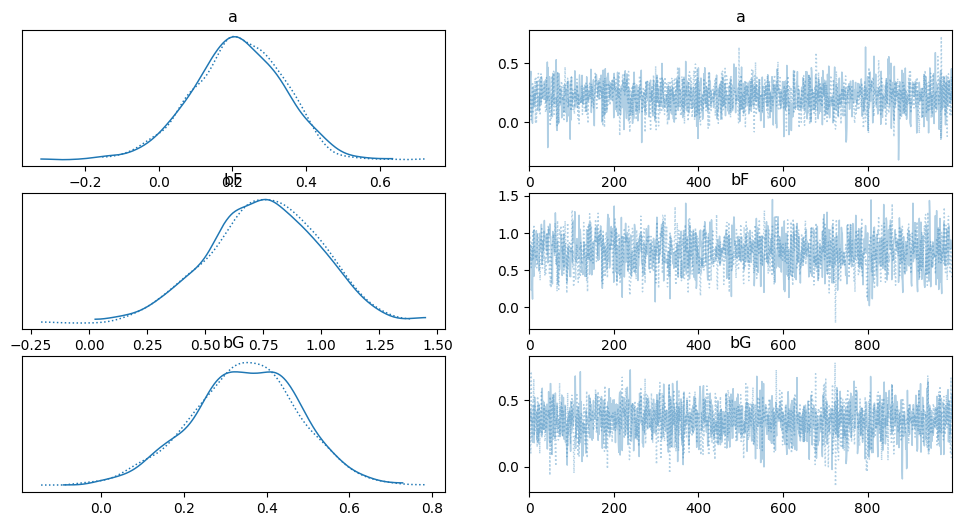

In [ ]:
az.plot_trace(cdata, var_names=["a", "bF","bG"])

##Posterior Model


In [ ]:
data_new['Rolling_Std_Dev'] = data_new['Rolling Std Dev']


In [ ]:
data_new.head()

,Date,Price,High_x,Low_x,Close_x,Volume_x,Adj Close_x,Monthly Return,Rolling Std Dev,Monthly Volatility,Previous Month Volatility,Interest_Rate_Change,Volume_lag1,Interest_Rate_Change_lag1,Rolling_Std_lag1,Rolling_Std_Dev
3,2013-11-01,-1.074593,-1.094460,-1.073428,-1.076103,0.727045,-1.076103,0.179517,0.598650,-0.961399,2.081985,-1.117104,4.527465,-1.215541,1.406639,0.598650
9,2014-05-01,-1.048627,-1.035691,-1.060849,-1.015795,0.004500,-1.015795,0.770091,0.448636,0.218210,0.497671,-1.082701,1.948607,-1.041294,-0.153075,0.448636
12,2014-08-01,-0.983858,-1.008084,-0.972168,-0.999987,-0.808280,-0.999987,-0.162748,-1.302201,-1.125733,-0.868511,-1.033447,-0.184182,-1.008322,-0.654909,-1.302201
21,2015-05-01,-1.024704,-1.062205,-1.027515,-1.054146,-0.588770,-1.054146,-0.323513,-1.632388,-1.220333,-0.193539,-1.064963,0.154749,-1.067308,-0.791799,-1.632388
22,2015-06-01,-1.027329,-1.052092,-1.017138,-1.062051,-0.405262,-1.062051,-0.377543,-1.671840,-1.187479,-1.156617,-1.067701,-0.588770,-1.064963,-1.632388,-1.671840


In [ ]:
data_new.drop('Rolling Std Dev', axis=1)

,Date,Price,High_x,Low_x,Close_x,Volume_x,Adj Close_x,Monthly Return,Monthly Volatility,Previous Month Volatility,Interest_Rate_Change,Volume_lag1,Interest_Rate_Change_lag1,Rolling_Std_lag1,Rolling_Std_Dev
3,2013-11-01,-1.074593,-1.094460,-1.073428,-1.076103,0.727045,-1.076103,0.179517,-0.961399,2.081985,-1.117104,4.527465,-1.215541,1.406639,0.598650
9,2014-05-01,-1.048627,-1.035691,-1.060849,-1.015795,0.004500,-1.015795,0.770091,0.218210,0.497671,-1.082701,1.948607,-1.041294,-0.153075,0.448636
12,2014-08-01,-0.983858,-1.008084,-0.972168,-0.999987,-0.808280,-0.999987,-0.162748,-1.125733,-0.868511,-1.033447,-0.184182,-1.008322,-0.654909,-1.302201
21,2015-05-01,-1.024704,-1.062205,-1.027515,-1.054146,-0.588770,-1.054146,-0.323513,-1.220333,-0.193539,-1.064963,0.154749,-1.067308,-0.791799,-1.632388
22,2015-06-01,-1.027329,-1.052092,-1.017138,-1.062051,-0.405262,-1.062051,-0.377543,-1.187479,-1.156617,-1.067701,-0.588770,-1.064963,-1.632388,-1.671840
23,2015-07-01,-1.034915,-0.850091,-1.015565,-0.889910,1.783048,-0.889910,2.942061,3.890224,-1.124717,-1.076002,-0.405262,-1.067701,-1.671840,1.895869
26,2015-10-01,-0.897208,-0.796516,-0.871851,-0.773101,0.582825,-0.773101,2.027845,1.441855,-0.220188,-0.937384,0.143600,-0.954855,2.002701,0.993258
31,2016-03-01,-0.775840,-0.762622,-0.757383,-0.735628,0.083880,-0.735628,0.697900,-0.195513,1.038532,-0.796702,1.724240,-0.756535,-0.652267,0.003858
32,2016-04-01,-0.723325,-0.744034,-0.758641,-0.816429,0.346248,-0.816429,-1.288004,0.041824,-0.161576,-0.758080,0.083880,-0.796702,0.003858,0.347179
35,2016-07-01,-0.799180,-0.726267,-0.765245,-0.694057,-0.572978,-0.694057,1.586234,0.678729,-0.109212,-0.841532,0.037968,-0.787868,0.267694,0.874307


<ipython-input-56-b5a248aeb406>:18: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = az.hdi(posterior_a[:, None] + posterior_b[:, None] * x, hdi_prob=0.95)


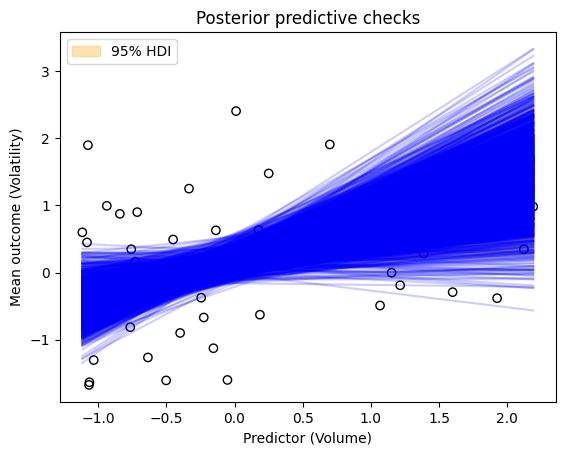

In [ ]:
#Posterior Model
age = data_new.Interest_Rate_Change
W_new = data_new.Rolling_Std_Dev

# Extract posterior samples from InferenceData
posterior_a = cdata.posterior["a"].values.flatten()
posterior_b = cdata.posterior["b"].values.flatten()

f, ax = plt.subplots()

# Plotting mean lines
x = np.linspace(age.min(), age.max(), 100)
for a, b in zip(posterior_a, posterior_b):
    y = a + b * x
    ax.plot(x, y, c="blue", alpha=0.2)

# Calculate mean and uncertainty around predictions
mean_prediction = np.mean(posterior_a[:, None] + posterior_b[:, None] * x, axis=0)
hdi = az.hdi(posterior_a[:, None] + posterior_b[:, None] * x, hdi_prob=0.95)

# Uncertainty around all predictions
ax.fill_between(x, hdi[:, 0], hdi[:, 1], color='orange', alpha=0.3, label='95% HDI')

# All raw data
ax.scatter(age, W_new, facecolors='none', edgecolors='k')

ax.set_xlabel("Predictor (Volume)")
ax.set_ylabel("Mean outcome (Volatility)")
ax.set_title("Posterior predictive checks")
plt.legend()
plt.show()


*  The trend suggests that as trading volume increases from negative towards zero, market volatility decreases. This could mean that lower or negative standardized values of volume (possibly indicating lower than average volumes) are associated with higher volatility, which may decrease as volume returns to normal levels.
*  As trading volume moves from zero to positive values, the variability in market volatility predictions increases significantly, with the upper bound of predictions shooting up steeply as volume increases. This suggests that higher trading volumes might be associated with a wider range of potential volatility outcomes.

Index(['a', 'b', 'sigma', 'mu'], dtype='object')
(0.191, array([-1.72006544,  2.03159387]))
Index(['a', 'b', 'sigma', 'mu'], dtype='object')
(0.191, array([-1.72976687,  2.03089375]))
Index(['a', 'b', 'sigma', 'mu'], dtype='object')
(0.191, array([-1.66852785,  2.07905555]))
Index(['a', 'b', 'sigma', 'mu'], dtype='object')
(0.191, array([-1.64856719,  2.09074636]))
Index(['a', 'b', 'sigma', 'mu'], dtype='object')
(0.191, array([-1.68305721,  2.06125811]))
Index(['a', 'b', 'sigma', 'mu'], dtype='object')
(0.191, array([-1.68513379,  2.07834224]))
Index(['a', 'b', 'sigma', 'mu'], dtype='object')
(0.191, array([-1.67057368,  2.08210682]))
Index(['a', 'b', 'sigma', 'mu'], dtype='object')
(0.191, array([-1.6758768,  2.0769696]))
Index(['a', 'b', 'sigma', 'mu'], dtype='object')
(0.191, array([-1.68966831,  2.06798055]))
Index(['a', 'b', 'sigma', 'mu'], dtype='object')
(0.191, array([-1.64807216,  2.09732987]))


[Text(0.5, 0, 'sampling trial'),
 Text(0, 0.5, '89% HPDI'),
 Text(0.5, 1.0, 'Posterior predictions when A=0')]

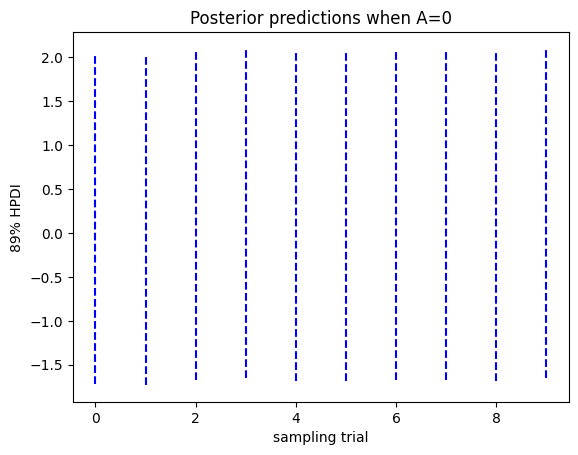

In [ ]:
# Make predictions using a function
def predict_sim(x, idata):

    # mean (easy to get)
    hi_mean = az.summary(idata).loc['a', 'mean'] + az.summary(idata).loc['b', 'mean'] * x

    # make it accessible
    idata_df = idata['posterior'].to_dataframe()
    print(idata_df.columns)
    # uncertainty requires thinking generatively
    mu_post_hi = idata_df['a'] + idata_df['b'].mean() * x
    sigma_post_hi = idata_df['sigma']
    hpdi_89 = az.hdi(stats.norm.rvs(mu_post_hi, sigma_post_hi))

    return hi_mean, hpdi_89

az.summary(cdata)
f, ax1 = plt.subplots()

for i, x in enumerate([0]*10):
    pred = predict_sim(x, cdata)
    print(pred)
    ax1.vlines(i, ymin=pred[1][0], ymax=pred[1][1], linestyle='dashed', color='blue')

ax1.set(xlabel='sampling trial', ylabel="89% HPDI", title='Posterior predictions when A=0')

*  All the vertical lines (sampling trials) show remarkably consistent prediction intervals. This indicates that when the predictor "A" is set to 0, the model's predictions about the outcome are stable and consistent across different sampling trials. This uniformity suggests a well-calibrated model under the condition of "A=0".
*  For practical purposes, such as decision-making or policy setting based on this model, the wide range of predicted outcomes implies that other variables (not shown here) might need to be considered to narrow down the predictions or that "A" being zero is a condition under which the outcome is highly uncertain.

## Conclusion & Future Work:



1.Model Refinement: Further refinement of the Bayesian VAR model to incorporate additional variables or consider different specifications. This could involve exploring alternative lag structures, adding exogenous variables, or testing different prior distributions for the model parameters.

2.Incorporating Additional Data: Expand the analysis by incorporating additional relevant data sources, such as macroeconomic indicators, industry-specific variables, or sentiment analysis from news articles or social media. This could provide a more comprehensive understanding of the factors influencing market volatility.

3.Evaluation Metrics: Develop and implement evaluation metrics to assess the performance of the Bayesian VAR model. This could involve measures such as forecasting accuracy, model fit statistics, or out-of-sample testing to evaluate the model's predictive ability.

4.Causal Inference Techniques: Explore alternative causal inference techniques to better understand the causal relationships between variables. This could involve employing methods such as instrumental variable regression, propensity score matching, or causal mediation analysis to address potential confounding and improve causal inference.

5.Explore other statistical models and create a comparative analysis. This could involve employing methods such as Linear Regression, ARIMA, GARCH which are commonly used statistical models for time series analysis dataset.


6.Real-Time Analysis: Adapt the analysis framework to perform real-time monitoring and analysis of market volatility. This could involve building a pipeline for data ingestion, preprocessing, modeling, and visualization to provide timely insights into changing market dynamics.

